# Libraries and Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Statistics with Python/Regression Analysis/Capstone Project: Titanic Survivor Prediction

/content/drive/MyDrive/Statistics with Python/Regression Analysis/Capstone Project: Titanic Survivor Prediction


In [3]:
# Importing essential libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
# Load the data
df = pd.read_csv("titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [42]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


# Data Analysis

In [43]:
# Summary Statistics
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [44]:
# Removing the "Name" column from the DataFrame
df = df.drop('Name', axis=1)

# Transforming the "Sex" column into a binary variable (0 for male, 1 for female)
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

# Transforming the "Pclass" column into dummy variables and concatenating to the DataFrame
pclass_dummies = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first = True)
df = pd.concat([df, pclass_dummies], axis=1)

# Optionally, you can drop the original "Pclass" column since it has been replaced with dummies
df = df.drop('Pclass', axis=1)

# Display the updated DataFrame to check the changes
df.head()

,Survived,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_2,Pclass_3
0,0,0,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,0
4,0,0,35.0,0,0,8.0500,0,1


In [45]:
# Check with the df.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Sex                      887 non-null    int64  
 2   Age                      887 non-null    float64
 3   Siblings/Spouses Aboard  887 non-null    int64  
 4   Parents/Children Aboard  887 non-null    int64  
 5   Fare                     887 non-null    float64
 6   Pclass_2                 887 non-null    uint8  
 7   Pclass_3                 887 non-null    uint8  
dtypes: float64(2), int64(4), uint8(2)
memory usage: 43.4 KB


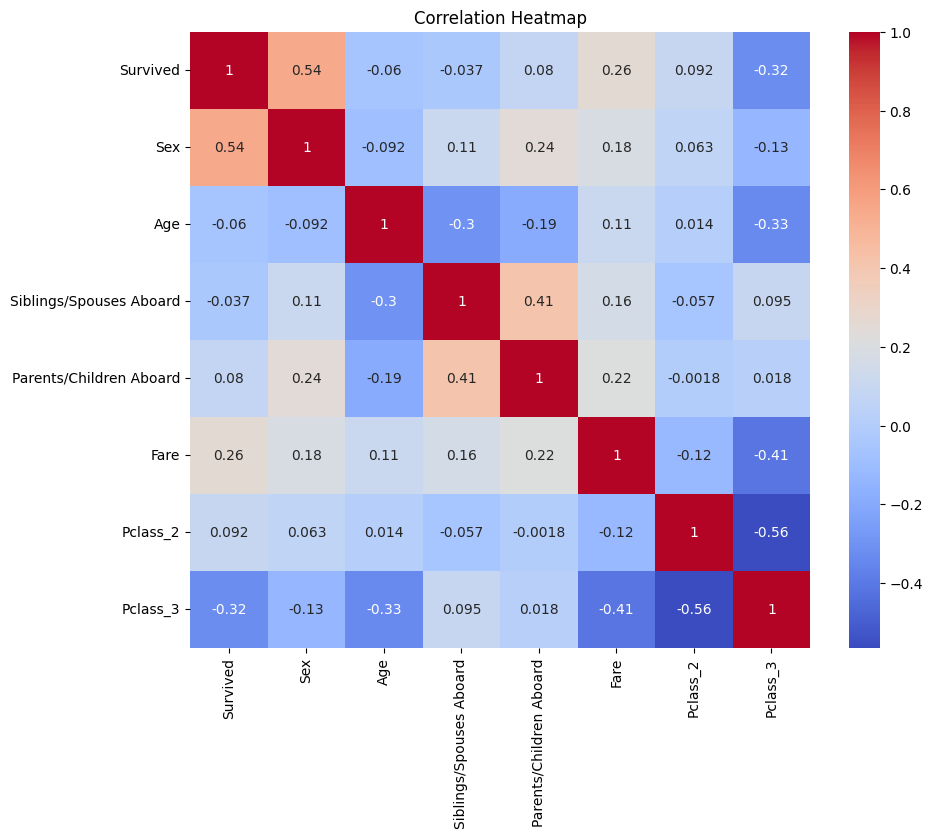

In [46]:
# Importing seaborn for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for continuous variables
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [47]:
def remove_outliers_using_std(df, threshold=3):
    for column in df.columns:
        # Skip binary variables
        if len(df[column].unique()) > 2:
            mean = df[column].mean()
            std = df[column].std()
            # Define bounds for the acceptable range
            lower_bound = mean - threshold * std
            upper_bound = mean + threshold * std
            # Filter the values based on the standard deviation range for each column
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Example usage
df = remove_outliers_using_std(df, threshold=3)
df.head()

,Survived,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_2,Pclass_3
0,0,0,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,0
4,0,0,35.0,0,0,8.0500,0,1


In [48]:
# Summary Statistics
df.describe()

,Survived,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_2,Pclass_3
count,821.000000,821.000000,821.00000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,0.389769,0.342266,29.88084,0.349574,0.255786,25.968244,0.221681,0.540804
std,0.487995,0.474757,13.66483,0.619473,0.565561,29.843263,0.415631,0.498636
min,0.000000,0.000000,0.42000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,21.00000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,0.000000,28.00000,0.000000,0.000000,13.000000,0.000000,1.000000
75%,1.000000,1.000000,38.00000,1.000000,0.000000,27.720800,0.000000,1.000000
max,1.000000,1.000000,71.00000,3.000000,2.000000,164.866700,1.000000,1.000000


# Logistic Regression

In [49]:
# Define the target variable (y) and features (X)
y = df['Survived']  # Assuming 'Survived' is the target column
X = df.drop('Survived', axis=1)  # Drop the target column from features

# Adding a constant (intercept) to the features
X = sm.add_constant(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1502)

In [56]:
# Create and fit the logistic regression model
model = sm.Logit(y_train, X_train).fit()

# Print the summary of the logistic regression model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.447951
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  656
Model:                          Logit   Df Residuals:                      648
Method:                           MLE   Df Model:                            7
Date:                Fri, 11 Aug 2023   Pseudo R-squ.:                  0.3360
Time:                        13:20:36   Log-Likelihood:                -293.86
converged:                       True   LL-Null:                       -442.53
Covariance Type:            nonrobust   LLR p-value:                 2.232e-60
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.8766      0.536      1.635      0.102      -0.174   

In [57]:
# Predict the probabilities of the test set
y_pred_prob = model.predict(X_test)

# You can threshold the predicted probabilities to create binary predictions
# For example, you can classify observations as '1' if predicted probability is greater than 0.5, else '0'
y_pred = [1 if p > 0.5 else 0 for p in y_pred_prob]

In [58]:
def interpret_logistic_regression(model):
    """
    Interprets the coefficients of a logistic regression model fitted using statsmodels.
    The interpretation is provided in terms of the percentage increase in odds for the event to happen.
    The function automatically detects binary variables and provides information about statistical significance.

    Parameters:
    model : statsmodels.discrete.discrete_model.LogitResultsWrapper
        The fitted logistic regression model.

    Example usage:
        import statsmodels.api as sm
        X = sm.add_constant(data[['feature1', 'feature2']])
        y = data['binary_outcome']
        model = sm.Logit(y, X).fit()
        interpret_logistic_regression(model)
    """

    variables = model.model.exog_names[1:]  # Exclude the constant
    params = model.params[1:]  # Exclude the constant
    pvalues = model.pvalues[1:]  # Exclude the constant

    # Identify binary variables by checking if the min and max of the exogenous variable are 0 and 1
    binary_vars = [var for var, values in zip(variables, model.model.exog[:, 1:].T) if min(values) == 0 and max(values) == 1]

    for variable, coef, pvalue in zip(variables, params, pvalues):
        print('-' * 50)

        # Calculate percentage increase in odds
        percentage_increase = (np.exp(coef) - 1) * 100

        if variable in binary_vars:
            print(f"For the binary variable '{variable}':")
            print(f"  - If this variable changes from 0 to 1, the odds of the event happening increase by {percentage_increase:.2f}%.")
        else:
            print(f"For the continuous variable '{variable}':")
            print(f"  - A unit increase in this variable increases the odds of the event happening by {percentage_increase:.2f}%.")

        # Check for statistical significance
        if pvalue < 0.05:
            print("  - This variable is statistically significant at the 0.05 level.")
        else:
            print("  - This variable is not statistically significant at the 0.05 level.")

    print('-' * 50)


In [59]:
# Exercise: To create a function that computes the 4 KPIs for classification problem
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

def evaluate_classification_model(y_true, y_pred):
    """
    Evaluates a classification model by computing the accuracy, F1-score, sensitivity, and specificity.

    Parameters:
    y_true : array-like
        True labels of the samples.
    y_pred : array-like
        Predicted labels of the samples.

    Example usage:
        y_true = [1, 0, 1, 1, 0]
        y_pred = [1, 0, 0, 1, 1]
        evaluate_classification_model(y_true, y_pred)
    """

    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:")
    print("  - Measures the proportion of correctly classified instances out of the total instances.")
    print(f"  - Result: {accuracy:.2f}\n")

    # F1-Score
    f1 = f1_score(y_true, y_pred)
    print("F1-Score:")
    print("  - Harmonic mean of precision and recall, balances both false positives and false negatives.")
    print(f"  - Result: {f1:.2f}\n")

    # Sensitivity (Recall)
    sensitivity = tp / (tp + fn)
    print("Sensitivity (Recall):")
    print("  - Measures the proportion of actual positives that are correctly identified as such.")
    print(f"  - Result: {sensitivity:.2f}\n")

    # Specificity
    specificity = tn / (tn + fp)
    print("Specificity:")
    print("  - Measures the proportion of actual negatives that are correctly identified as such.")
    print(f"  - Result: {specificity:.2f}\n")

In [60]:
# Apply function to read coefficients
interpret_logistic_regression(model)

--------------------------------------------------
For the binary variable 'Sex':
  - If this variable changes from 0 to 1, the odds of the event happening increase by 1400.99%.
  - This variable is statistically significant at the 0.05 level.
--------------------------------------------------
For the continuous variable 'Age':
  - A unit increase in this variable increases the odds of the event happening by -3.79%.
  - This variable is statistically significant at the 0.05 level.
--------------------------------------------------
For the continuous variable 'Siblings/Spouses Aboard':
  - A unit increase in this variable increases the odds of the event happening by -35.13%.
  - This variable is statistically significant at the 0.05 level.
--------------------------------------------------
For the continuous variable 'Parents/Children Aboard':
  - A unit increase in this variable increases the odds of the event happening by 14.58%.
  - This variable is not statistically significant at t

In [64]:
# Assess model
print(f"The mean of the y_test is {y_test.mean()}")
evaluate_classification_model(y_test, y_pred)

The mean of the y_test is 0.3333333333333333
Accuracy:
  - Measures the proportion of correctly classified instances out of the total instances.
  - Result: 0.78

F1-Score:
  - Harmonic mean of precision and recall, balances both false positives and false negatives.
  - Result: 0.68

Sensitivity (Recall):
  - Measures the proportion of actual positives that are correctly identified as such.
  - Result: 0.71

Specificity:
  - Measures the proportion of actual negatives that are correctly identified as such.
  - Result: 0.82

